In [1]:
from jitcdde import t
from parameters import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import sys
sys.path.append(os.getcwd()+"/../../")
from msrDynamics.objects import Node, System

Instantiate System Object & Nodes

In [2]:
# ARE system        
ARE = System()

# CORE NODES
c_f1 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f1)
c_f2 = Node(m = m_f_c/2, scp = scp_f, W = W_f, y0 = T0_c_f2)
c_t1 = Node(m = m_t/2, scp = scp_t, y0 = T0_c_t1)
c_t2 = Node(m = m_t/2, scp = scp_t, y0 = T0_c_t1)
c_c1 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c1)
c_c2 = Node(m = m_c_c/2, scp = scp_c, W = W_c, y0 = T0_c_c2) 
c_m1 = Node(m = m_m_c, scp = scp_m, y0 = T0_c_m+50)
n = Node(y0 = n_frac0)
C1 = Node(y0 = C0[0])
C2 = Node(y0 = C0[1])
C3 = Node(y0 = C0[2])
C4 = Node(y0 = C0[3])
C5 = Node(y0 = C0[4])
C6 = Node(y0 = C0[5])
rho = Node(y0 = 0.0)

# add reactivity input
def rho_insert(t):
    if (t<t_ins):
        return 0.0
    elif (t<(t_ins+insert_duration)):
        return ((t-t_ins))*(inserted/insert_duration) # linear
    elif (t < t_wd):
        return inserted
    elif (t < t_wd+insert_duration):
        return inserted-((t-t_wd))*(inserted/insert_duration) # linear
    else:
        return 0.0

rho_ext = ARE.add_input(rho_insert, T)

# FUEL-HELIUM HX1
hx_fh1_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1)
hx_fh1_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2)
hx_fh1_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1)
hx_fh1_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1)
hx_fh1_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2)

# FUEL-HELIUM HX2
hx_fh2_f1 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f1)
hx_fh2_f2 = Node(m = m_f_hx/2, scp = scp_f, W = W_f/2, y0 = T0_hfh_f2)
hx_fh2_t1 = Node(m = m_t_hxfh, scp = scp_t, y0 = T0_hfh_t1)
hx_fh2_h1 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h1)
hx_fh2_h2 = Node(m = m_h_hxfh/2, scp = scp_h, W = W_h_fh, y0 = T0_hfh_h2)

# COOLANT-HELIUM HX1
hx_ch1_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1)
hx_ch1_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2)
hx_ch1_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hch_t1)
hx_ch1_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1)
hx_ch1_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2)

# COOLANT-HELIUM HX2
hx_ch2_c1 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c1)
hx_ch2_c2 = Node(m = m_c_hx/2, scp = scp_c, W = W_c/2, y0 = T0_hch_c2)
hx_ch2_t1 = Node(m = m_t_hxch, scp = scp_t, y0 = T0_hfh_t1)
hx_ch2_h1 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h1)
hx_ch2_h2 = Node(m = m_h_hxch/2, scp = scp_h, W = W_h_ch, y0 = T0_hch_h2)

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1)
hx_hwf1_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2)
hx_hwf1_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwf1_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1)
hx_hwf1_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2)

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h1)
hx_hwf2_h2 = Node(m = m_h_hxhwf/2, scp = scp_h, W = W_h_fh, y0 = T0_hhwf_h2)
hx_hwf2_t1 = Node(m = m_t_hxhwf, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwf2_w1 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w1)
hx_hwf2_w2 = Node(m = m_w_hxhwf/2, scp = scp_w, W = W_hhwf_w, y0 = T0_hhwf_w2)

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1)
hx_hwc1_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2)
hx_hwc1_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwc1_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1)
hx_hwc1_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2)

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h1)
hx_hwc2_h2 = Node(m = m_h_hxhwc/2, scp = scp_h, W = W_h_ch, y0 = T0_hhwc_h2)
hx_hwc2_t1 = Node(m = m_t_hxhwc, scp = scp_t, y0 = T0_hhwf_t1)
hx_hwc2_w1 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w1)
hx_hwc2_w2 = Node(m = m_w_hxhwc/2, scp = scp_w, W = W_hhwc_w, y0 = T0_hhwc_w2)



In [3]:


ARE.add_nodes([c_f1,c_f2,c_t1,c_c1,c_c2,c_m1,n,C1,C2,C3,C4,C5,C6,rho,
              hx_fh1_f1,hx_fh1_f2,hx_fh1_t1,hx_fh1_h1,hx_fh1_h2,
              hx_fh2_f1,hx_fh2_f2,hx_fh2_t1,hx_fh2_h1,hx_fh2_h2,
              hx_ch1_c1,hx_ch1_c2,hx_ch1_t1,hx_ch1_h1,hx_ch1_h2,
              hx_ch2_c1,hx_ch2_c2,hx_ch2_t1,hx_ch2_h1,hx_ch2_h2,
              hx_hwf1_h1,hx_hwf1_h2,hx_hwf1_t1,hx_hwf1_w1,hx_hwf1_w2,
              hx_hwf2_h1,hx_hwf2_h2,hx_hwf2_t1,hx_hwf2_w1,hx_hwf2_w2,
              hx_hwc1_h1,hx_hwc1_h2,hx_hwc1_t1,hx_hwc1_w1,hx_hwc1_w2,
              hx_hwc2_h1,hx_hwc2_h2,hx_hwc2_t1,hx_hwc2_w1,hx_hwc2_w2,
              c_t2])

Define Dynamics

In [4]:
# CORE
c_f1.set_dTdt_bulkFlow(source = (hx_fh1_f2.y(t-tau_hx_c_f)+hx_fh2_f2.y(t-tau_hx_c_f))/2) 
c_f1.set_dTdt_internal(source = n.y(), k = k_f1*P/mcp_f_c)
c_f1.set_dTdt_convective(source = [c_t1.y()], hA = [hA_ft_c/2])

c_f2.set_dTdt_bulkFlow(source = c_f1.y()) 
c_f2.set_dTdt_internal(source = n.y(), k = k_f2*P/mcp_f_c)
c_f2.set_dTdt_convective(source = [c_t2.y()], hA = [hA_ft_c/2])

c_t1.set_dTdt_convective(source = [c_f1.y(),c_c2.y()], 
                         hA = [hA_ft_c/2,hA_tc_c/2])

c_t2.set_dTdt_convective(source = [c_f2.y(), c_c1.y()], 
                         hA = [hA_ft_c/2,hA_tc_c/2])

c_c1.set_dTdt_bulkFlow(source = (hx_ch1_c2.y(t-tau_c_hx_f)+hx_ch2_c2.y(t-tau_c_hx_f))/2)
c_c1.set_dTdt_convective(source = [c_t2.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_c2.set_dTdt_bulkFlow(source = c_c1.y())
c_c2.set_dTdt_convective(source = [c_t1.y(),c_m1.y()], hA = [hA_tc_c/2,hA_mc_c/2])

c_m1.set_dTdt_internal(source = n.y(), k = k_m*P/mcp_m_c)
c_m1.set_dTdt_convective(source = [c_c1.y(), c_c2.y()], hA = [hA_mc_c/2]*2)

n.set_dndt(rho.y()+rho_ext, beta_t, Lam, lam, [C1.y(), C2.y(), C3.y(), C4.y(), C5.y(), C6.y()])
C1.set_dcdt(n.y(), beta[0], Lam, lam[0], tau_c, tau_l)
C2.set_dcdt(n.y(), beta[1], Lam, lam[1], tau_c, tau_l)
C3.set_dcdt(n.y(), beta[2], Lam, lam[2], tau_c, tau_l)
C4.set_dcdt(n.y(), beta[3], Lam, lam[3], tau_c, tau_l)
C5.set_dcdt(n.y(), beta[4], Lam, lam[4], tau_c, tau_l)
C6.set_dcdt(n.y(), beta[5], Lam, lam[5], tau_c, tau_l)
rho.set_drdt([c_f1.dydt(),c_f2.dydt(),c_m1.dydt(),c_c1.dydt(),c_c2.dydt()],[a_f/2,a_f/2,a_b,a_c/2,a_c/2])

# FUEL-HELIUM HX1
hx_fh1_f1.set_dTdt_bulkFlow(source = c_f2.y(t-tau_c_hx_f))
hx_fh1_f1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])

hx_fh1_f2.set_dTdt_bulkFlow(source = hx_fh1_f1.y())
hx_fh1_f2.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ft_hx/2])

hx_fh1_t1.set_dTdt_convective(source = [hx_fh1_f1.y(),hx_fh1_f2.y(),hx_fh1_h1.y(),hx_fh1_h2.y()],
                              hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])

hx_fh1_h1.set_dTdt_bulkFlow(source = hx_hwf2_h2.y(t-tau_h))
hx_fh1_h1.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

hx_fh1_h2.set_dTdt_bulkFlow(source = hx_fh1_h1.y())
hx_fh1_h2.set_dTdt_convective(source = [hx_fh1_t1.y()], hA = [hA_ht_hx/2])

# FUEL-HELIUM HX2
hx_fh2_f1.set_dTdt_bulkFlow(source = c_f2.y(t-tau_c_hx_f))
hx_fh2_f1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])

hx_fh2_f2.set_dTdt_bulkFlow(source = hx_fh2_f1.y())
hx_fh2_f2.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ft_hx/2])

hx_fh2_t1.set_dTdt_convective(source = [hx_fh2_f1.y(),hx_fh2_f2.y(),hx_fh2_h1.y(),hx_fh2_h2.y()],
                              hA = [hA_ft_hx/2,hA_ft_hx/2,hA_ht_hx/2,hA_ht_hx/2])

hx_fh2_h1.set_dTdt_bulkFlow(source = hx_hwf1_h2.y())
hx_fh2_h1.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

hx_fh2_h2.set_dTdt_bulkFlow(source = hx_fh2_h1.y())
hx_fh2_h2.set_dTdt_convective(source = [hx_fh2_t1.y()], hA = [hA_ht_hx/2])

# COOLANT-HELIUM HX1
hx_ch1_c1.set_dTdt_bulkFlow(source = c_c2.y(t-tau_c_hx_f))
hx_ch1_c1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])

hx_ch1_c2.set_dTdt_bulkFlow(source = hx_ch1_c1.y())
hx_ch1_c2.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_ct_hx/2])

hx_ch1_t1.set_dTdt_convective(source = [hx_ch1_c1.y(),hx_ch1_c2.y(),hx_ch1_h1.y(),hx_ch1_h2.y()],
                              hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])

hx_ch1_h1.set_dTdt_bulkFlow(source = hx_hwc1_h2.y(t-tau_h))
hx_ch1_h1.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

hx_ch1_h2.set_dTdt_bulkFlow(source = hx_ch1_h1.y())
hx_ch1_h2.set_dTdt_convective(source = [hx_ch1_t1.y()], hA = [hA_th_hxch/2])

# COOLANT-HELIUM HX2
hx_ch2_c1.set_dTdt_bulkFlow(source = c_c2.y(t-tau_c_hx_f))
hx_ch2_c1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])

hx_ch2_c2.set_dTdt_bulkFlow(source = hx_ch2_c1.y())
hx_ch2_c2.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_ct_hx/2])

hx_ch2_t1.set_dTdt_convective(source = [hx_ch2_c1.y(),hx_ch2_c2.y(),hx_ch2_h1.y(),hx_ch2_h2.y()],
                              hA = [hA_ct_hx/2,hA_ct_hx/2,hA_th_hxch/2,hA_th_hxch/2])

hx_ch2_h1.set_dTdt_bulkFlow(source = hx_hwc2_h2.y(t-tau_h))
hx_ch2_h1.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

hx_ch2_h2.set_dTdt_bulkFlow(source = hx_ch2_h1.y())
hx_ch2_h2.set_dTdt_convective(source = [hx_ch2_t1.y()], hA = [hA_th_hxch/2])

# HELIUM-WATER HX1 (FUEL LOOP)
hx_hwf1_h1.set_dTdt_bulkFlow(source = hx_fh1_h2.y())
hx_hwf1_h1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf1_h2.set_dTdt_bulkFlow(source = hx_hwf1_h1.y())
hx_hwf1_h2.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf1_t1.set_dTdt_convective(source = [hx_hwf1_h1.y(),hx_hwf1_h2.y(),hx_hwf1_w1.y(),hx_hwf1_w2.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])

hx_hwf1_w1.set_dTdt_bulkFlow(source = T0_hhwf_w1)
hx_hwf1_w1.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf1_w2.set_dTdt_bulkFlow(source = hx_hwf1_w1.y())
hx_hwf1_w2.set_dTdt_convective(source = [hx_hwf1_t1.y()], hA = [hA_tw_hxhw/2])

# HELIUM-WATER HX2 (FUEL LOOP)
hx_hwf2_h1.set_dTdt_bulkFlow(source = hx_fh2_h2.y())
hx_hwf2_h1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf2_h2.set_dTdt_bulkFlow(source = hx_hwf2_h1.y())
hx_hwf2_h2.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_ht_hxhw/2])

hx_hwf2_t1.set_dTdt_convective(source = [hx_hwf2_h1.y(),hx_hwf2_h2.y(),hx_hwf2_w1.y(),hx_hwf2_w2.y()],
                               hA = [hA_ht_hxhw/2,hA_ht_hxhw/2,hA_tw_hxhw/2,hA_tw_hxhw/2])

hx_hwf2_w1.set_dTdt_bulkFlow(source = T0_hhwf_w1)
hx_hwf2_w1.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

hx_hwf2_w2.set_dTdt_bulkFlow(source = hx_hwf2_w1.y())
hx_hwf2_w2.set_dTdt_convective(source = [hx_hwf2_t1.y()], hA = [hA_tw_hxhw/2])

# HELIUM-WATER HX1 (COOLANT LOOP)
hx_hwc1_h1.set_dTdt_bulkFlow(source = hx_ch1_h2.y())
hx_hwc1_h1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc1_h2.set_dTdt_bulkFlow(source = hx_hwc1_h1.y())
hx_hwc1_h2.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc1_t1.set_dTdt_convective(source = [hx_hwc1_h1.y(),hx_hwc1_h2.y(),hx_hwc1_w1.y(),hx_hwc1_w2.y()],
                               hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])

hx_hwc1_w1.set_dTdt_bulkFlow(source = T0_hhwc_w1)
hx_hwc1_w1.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc1_w2.set_dTdt_bulkFlow(source = hx_hwc1_w1.y())
hx_hwc1_w2.set_dTdt_convective(source = [hx_hwc1_t1.y()], hA = [hA_tw_hxhwc/2])

# HELIUM-WATER HX2 (COOLANT LOOP)
hx_hwc2_h1.set_dTdt_bulkFlow(source = hx_ch2_h2.y())
hx_hwc2_h1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc2_h2.set_dTdt_bulkFlow(source = hx_hwc2_h1.y())
hx_hwc2_h2.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_ht_hxhwc/2])

hx_hwc2_t1.set_dTdt_convective(source = [hx_hwc2_h1.y(),hx_hwc2_h2.y(),hx_hwc2_w1.y(),hx_hwc2_w2.y()],
                               hA = [hA_ht_hxhwc/2,hA_ht_hxhwc/2,hA_tw_hxhwc/2,hA_tw_hxhwc/2])

hx_hwc2_w1.set_dTdt_bulkFlow(source = T0_hhwc_w1)
hx_hwc2_w1.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])

hx_hwc2_w2.set_dTdt_bulkFlow(source = hx_hwc2_w1.y())
hx_hwc2_w2.set_dTdt_convective(source = [hx_hwc2_t1.y()], hA = [hA_tw_hxhwc/2])


In [5]:
# solve system 
ARE.finalize()
sol_jit = ARE.solve(T)

Generating, compiling, and loading C code.
Using default integration parameters.


/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.
  warn("You did not explicitly handle initial discontinuities. Proceed only if you know what you are doing. This is only fine if you somehow chose your initial past such that the derivative of the last anchor complies with the DDE. In this case, you can set the attribute `initial_discontinuities_handled` to `True` to suppress this warning. See https://jitcdde.rtfd.io/#discontinuities for details.")
/home/luke/git/envs/thesis_env/lib/python3.11/site-packages/jitcdde/_jitcdde.py:795: UserWarning: You did no

In [7]:
# unpack data 
df_power_reversed = pd.read_csv("./data/insertion.csv",header=None)
df_inlet_reversed = pd.read_csv("./data/fuel_inlet_temp.csv",header=None)
df_outlet_reversed = pd.read_csv("./data/fuel_outlet_temp.csv",header=None)
df_power = df_power_reversed.iloc[::-1] 
df_inlet = df_inlet_reversed.iloc[::-1]
df_outlet = df_outlet_reversed.iloc[::-1]
df_power = df_power.reset_index(drop=True)
df_inlet = df_inlet.reset_index(drop=True)
df_outlet = df_outlet.reset_index(drop=True)
df_inlet[1] = [F_to_K(t) for t in df_inlet[1]]
df_outlet[1] = [F_to_K(t) for t in df_outlet[1]]


# get indices for simulation data
t_before_data = (1110-df_inlet[0][0])*60
duration_data = (df_inlet.iloc[-1][0]-df_inlet[0][0])*60
t_end_data = df_inlet.iloc[-1][0]
t_before_sim = t_ins-t_before_data
T_insert = [t for t in T if (t > (t_before_sim)) and (t < (t_before_sim)+(duration_data))]
i_insert = [t[0] for t in enumerate(T) if (t[1] > (t_before_sim)) and (t[1] < (t_before_sim)+(duration_data))]
adj = (df_inlet[0][0])*60-T_insert[0]
df_outlet = df_outlet[:-2]

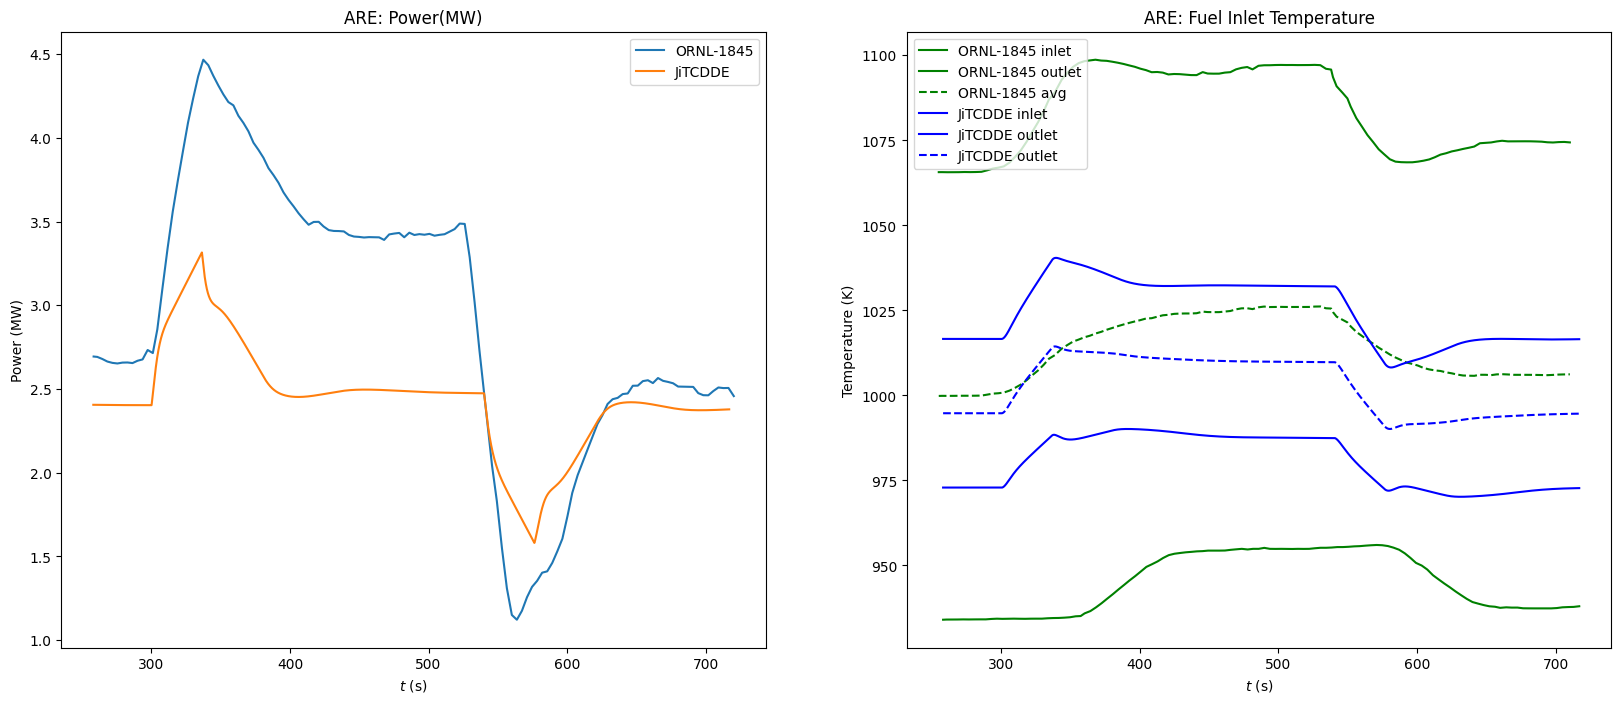

In [8]:
fig,axs = plt.subplots(1,2,figsize=(20,8))

# from relaxations import relax_feedback_insertion_beta
# sol_jit = relax_feedback_insertion_beta([-2.00000000e-04,  4.99999886e-05,  1.47679144e-04,  7.31105685e-03, 1.00000000e-03])

axs[0].plot(df_power[0]*60-adj,df_power[1],label="ORNL-1845")
axs[0].plot(T_insert,[s*P for s in n.y_out[i_insert[0]:(i_insert[-1]+1)]],label="JiTCDDE")
axs[0].set_xlabel(r"$t$ (s)")
axs[0].set_ylabel("Power (MW)")
axs[0].set_title("ARE: Power(MW)")
axs[0].legend()

ornl_avg = (df_inlet[1]+df_outlet[1])/2
jitcdde_avg = (pd.DataFrame([s[0] for s in sol_jit])+pd.DataFrame([s[1] for s in sol_jit]))/2

axs[1].plot(df_inlet[0]*60-adj,df_inlet[1],label="ORNL-1845 inlet",color="green")
axs[1].plot(df_outlet[0]*60-adj,df_outlet[1],label="ORNL-1845 outlet",color="green")
axs[1].plot(df_outlet[0]*60-adj,ornl_avg,label="ORNL-1845 avg",color="green",linestyle="--")
axs[1].plot(T_insert,[s[0] for s in sol_jit[i_insert[0]:(i_insert[-1]+1)]],label="JiTCDDE inlet",color="blue")
axs[1].plot(T_insert,[s[1] for s in sol_jit[i_insert[0]:(i_insert[-1]+1)]],label="JiTCDDE outlet",color="blue")
axs[1].plot(T_insert,jitcdde_avg[i_insert[0]:(i_insert[-1]+1)],label="JiTCDDE outlet",color="blue",linestyle="--")
axs[1].set_xlabel(r"$t$ (s)")
axs[1].set_ylabel("Temperature (K)")
axs[1].set_title("ARE: Fuel Inlet Temperature")
axs[1].legend()